In [1]:
import pandas as pd

Question Guiding Analytics

How has the workshop affected the learner's comfortability and programming confidence?
- The average increased/decreased level of comfort for each workshop, as well as a grand total for all of our workshops.
- A 3rd graph might compare the most recent workshop to the average?

In [2]:
#choice text export

#default here is dummy data
whole_pre_survey = pd.read_csv("Pre-Workshop Survey for Carpentry v.2_February 18, 2022_14.27.csv")

whole_post_survey = pd.read_csv("Post-Workshop Survey v.2_February 18, 2022_14.40.csv")

In [12]:
#exclude attributes we don't really care about
pre_survey = whole_pre_survey.loc[:, ~whole_pre_survey.columns.isin(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage'])]
post_survey = whole_post_survey.loc[:, ~whole_post_survey.columns.isin(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage'])]

post_survey.head(1)

,QID1,,Q18,Q19,Q2,Q3,Q3_11_TEXT,Q4_1,Q4_2,Q4_3,...,Q8_NPS_GROUP,Q8,Q9,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3
0,Please enter the first two digits of your phon...,Did you request accessibility accomodations?,Were there any accessibility issues that affec...,Anything to add that you think might help us t...,Were you at the workshop the entire time?,"If you didn't attend all the workshop days, wh...","If you didn't attend all the workshop days, wh...",Please rate each statement using this scale: -...,Please rate each statement using this scale: -...,Please rate each statement using this scale: -...,...,How likely are you to recommend this workshop ...,How likely are you to recommend this workshop ...,Do you have any suggestions for future worksho...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Q19 - I am confident in my ability to make use...,Q19 - Using a programming language (like R or ...,Q19 - Using a programming language (like R or ...


In [13]:
#functions that makes the following objects...
## pre_data: subset of the pre-workshop results of respondants who filled out both surveys
## post_data: subset of the post-workshop results of respondants who filled out both surveys
## Note: dropped extraneous rows for both df's

def presurvey_filtering(pre_results, post_results):
    comp_lst = []
    single_lst = []
    for i in post_results['QID1'].iloc[2:].tolist():
        if i in pre_results['Q1'].iloc[2:].tolist():
            comp_lst.append(i)
        else:
            single_lst.append(i)
    pre_data = pre_results.loc[pre_results['Q1'].isin(comp_lst)]
    return pre_data

def postsurvey_filtering(pre_results, post_results):
    comp_lst = []
    single_lst = []
    for i in post_results['QID1'].iloc[2:].tolist():
        if i in pre_results['Q1'].iloc[2:].tolist():
            comp_lst.append(i)
        else:
            single_lst.append(i)
    post_data = post_results.loc[post_results['QID1'].isin(comp_lst)]
    return post_data

In [16]:
# set na to -99 (I know that's usually a no-no but we filter using min/max values later on)
pre_data = presurvey_filtering(pre_survey, post_survey).fillna(-99)
post_data = postsurvey_filtering(pre_survey, post_survey).fillna(-99)

pre_data.head(5)

,Q1,Q3,Q3_1_TEXT,Q3_32_TEXT,Q4,Q5,Q5_3_TEXT,Q6,Q10_1,Q10_2,...,Q8,Q8_8_TEXT,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3,Q15
3,26muse,Computer Science,-99,-99,Undergrad Student,Laptop,-99,macOS,Never,Weekly,...,A friend or colleague told me about the workshop,-99,4,4,4,4,4,4,4,-99
4,02txma,Classics,-99,-99,Retired or Not Employed,Desktop Computer,-99,Windows,Several times per year,Monthly,...,Saw the workshop listed on a Carpentry website,-99,1,3,2,5,1,3,2,Bing bong
5,18empm,Other,-99,beep boop,Faculty,Laptop,-99,Linux,Weekly,Monthly,...,"Heard about the workshop at a conference, meet...",-99,4,1,5,-99,-99,-99,-99,-99
6,51yuni,No UCSB Affiliation,bada boom,-99,Support Staff/Technical Support,Other,tablet,macOS,Weekly,Less than once per year,...,Read about the workshop in a newsletter or on ...,-99,4,2,3,5,3,5,2,bleep bloop


In [17]:
post_data.head(5)

,QID1,,Q18,Q19,Q2,Q3,Q3_11_TEXT,Q4_1,Q4_2,Q4_3,...,Q8_NPS_GROUP,Q8,Q9,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3
2,26muse,No,-99,-99,Attended part of the workshop,Time conflict,-99,Somewhat\nDisagree\n,Somewhat\nDisagree\n,Somewhat\nDisagree\n,...,Passive,8,-99,4,4,4,4,4,4,4
3,02txma,Yes,No,meep meep,Attended part of the workshop,Unclear advertising about workshop time and da...,-99,Strongly Agree\n,Somewhat\nDisagree\n,Neither Agree\nor Disagree\n,...,Passive,8,-99,2,4,3,2,3,4,2
4,18empm,No,-99,-99,Attended the whole workshop,-99,-99,Strongly Agree\n,-99,Neither Agree\nor Disagree\n,...,Detractor,6,-99,2,5,-99,3,2,3,1
5,51yuni,No,-99,-99,Did not attend,"Forgot to attend,Other",shoop,-99,-99,-99,...,-99,-99,wonk,-99,-99,-99,-99,-99,-99,-99


Comparative Likert Scale Display

In [19]:
%matplotlib inline
from plotnine import *

In [20]:
# math from the likert scale results
# likert_summary: dict object that contains values for the dataframe used in plotting
Q18_1 = []
Q18_2 = []
Q18_3 = []
Q18_4 = []
Q19_1 = []
Q19_2 = []
Q19_3 = []

for i in pre_data['Q1']:
    pre_i = pre_data[['Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q19_1', 'Q19_2', 'Q19_3']].loc[pre_data['Q1'] == i]
    post_i = post_data[['Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q19_1', 'Q19_2', 'Q19_3']].loc[post_data['QID1'] == i]
    for ii in post_i.values.astype(int) - pre_i.values.astype(int):
        Q18_1.append(ii[0])
        Q18_2.append(ii[1])
        Q18_3.append(ii[2])
        Q18_4.append(ii[3])
        Q19_1.append(ii[4])
        Q19_2.append(ii[5])
        Q19_3.append(ii[6])
        
likert_summary = {'Q18_1': Q18_1, 'Q18_2': Q18_2, 'Q18_3': Q18_3, 'Q18_4': Q18_4, 'Q19_1': Q19_1, 'Q19_2':Q19_2, 'Q19_3': Q19_3}

,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3
0,0,0,0,0,0,0,0
1,1,1,1,-3,2,1,0
2,-2,4,-104,102,101,102,100
3,-103,-101,-102,-104,-102,-104,-101


In [28]:
likert_df = pd.DataFrame(data= likert_summary).T
likert_df.head(5)

,0,1,2,3
Q18_1,0,1,-2,-103
Q18_2,0,1,4,-101
Q18_3,0,1,-104,-102
Q18_4,0,-3,102,-104
Q19_1,0,2,101,-102


In [29]:
# add columns mean and question label attributes

likert_df['mean'] = likert_df[(11 > likert_df[0:len(likert_df)]) & (likert_df[0:len(likert_df)] > -11)].mean(axis=1)
likert_df['question'] = ['Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q19_1', 'Q19_2', 'Q19_3']
likert_df

,0,1,2,3,mean,question
Q18_1,0,1,-2,-103,-0.333333,Q18_1
Q18_2,0,1,4,-101,1.666667,Q18_2
Q18_3,0,1,-104,-102,0.500000,Q18_3
Q18_4,0,-3,102,-104,-1.500000,Q18_4
Q19_1,0,2,101,-102,1.000000,Q19_1
Q19_2,0,1,102,-104,0.500000,Q19_2
Q19_3,0,0,100,-101,0.000000,Q19_3


In [31]:
print('n= ', len(likert_df))

n=  7


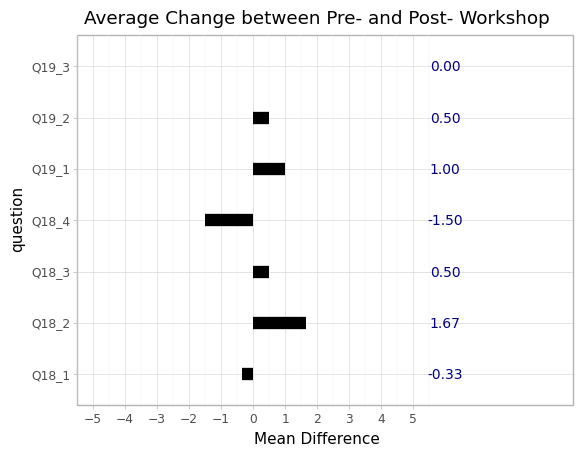

<ggplot: (132207837797)>

In [30]:
(ggplot(likert_df)
 # Range strip 
 + geom_segment(
     aes(x= 0 , xend='mean', y='question', yend='question'), size = 5)
 # overwrite default axis scale
 + scale_x_continuous(name= 'Mean Difference', expand= (0, 4), breaks= range(-5, 6, 1))
 # test settings
 + geom_text(likert_df, 
             aes(x= 6, y='question', label= ['{:.2f}'.format(value) for value in likert_df['mean']]), 
             size=10, color= 'navy')
 + theme_light()
 + labs(title= 'Average Change between Pre- and Post- Workshop')
)

Q19_3: Using a programming language (like R or Python) can make me more efficient at working with data.

Q19_2: Using a programming language (like R or Python) can make my analyses easier to reproduce.

Q19_1: I am confident in my ability to make use of programming software to work with data.

Q18_4: While working on a programming project, if I got stuck, I can find ways of overcoming the problem.

Q18_3: I know how to search for answers to my technical questions online.

Q18_2: I can write a small program, script, or macro to address a problem in my own work.

Q18_1: Having access to the original, raw data is important to be able to repeat an analysis.